# Ridge

In [1]:
import os, sys, pathlib

UTILS_FOLDER = "S00 - Utils"
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from utils import plot_reg, plot_res, store_results
from sklearn.linear_model import Ridge


In [3]:
# Load data
df = pd.read_excel(
    f"{utilPath}/housing_data.xlsx",
)

# Extract data
X = df[["LSTAT"]].values
y = df["MEDV"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [4]:
paramSet = {
    "ex1": {
        "alpha": 1,
    },
    "ex2": {
        "alpha": 1e2,
    },
    "ex3": {
        "alpha": 1e4,
    },
    "ex4": {
        "alpha": 1e6,
    },
}

,Model,Coef,Intercept,MSE Train,MSE Test,R2 Train,R2 Test,Params
0,Ridge-ex1,0.968086,34.789100,37.933978,39.816816,0.552478,0.521809,"{""alpha"": 1}"
1,Ridge-ex2,0.962698,34.722067,37.935458,39.785415,0.552461,0.522186,"{""alpha"": 100.0}"
2,Ridge-ex3,0.618468,30.439624,44.043058,44.183271,0.480407,0.469369,"{""alpha"": 10000.0}"
3,Ridge-ex4,0.016826,22.954806,83.150862,82.151166,0.019037,0.013383,"{""alpha"": 1000000.0}"


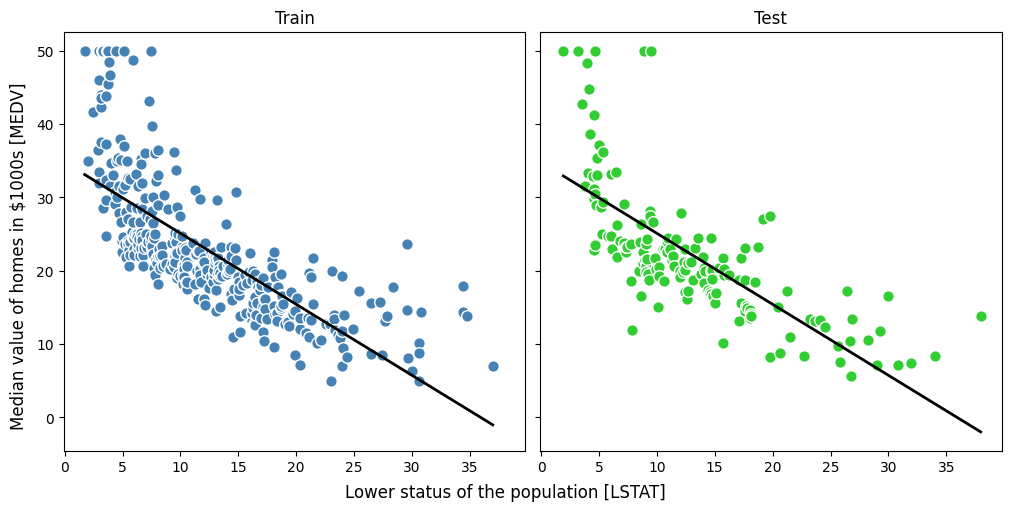

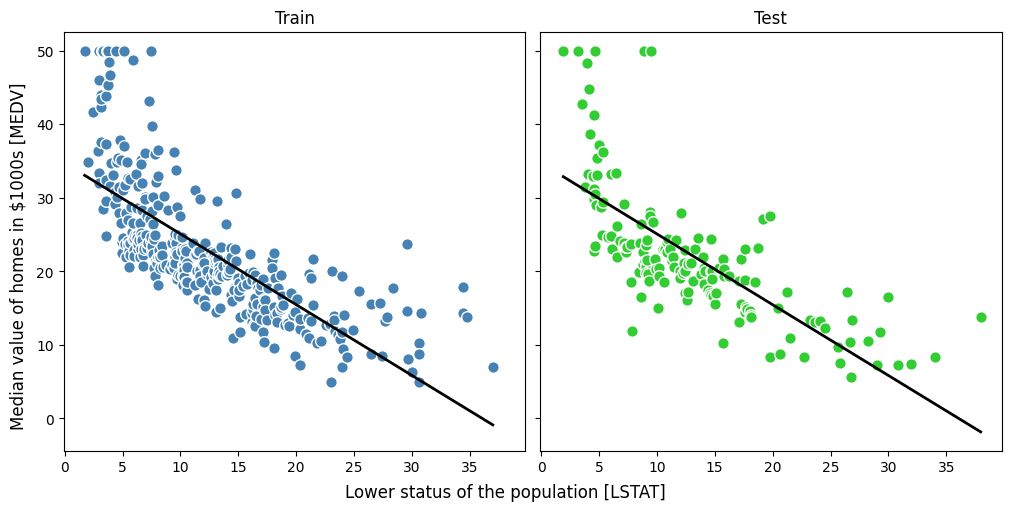

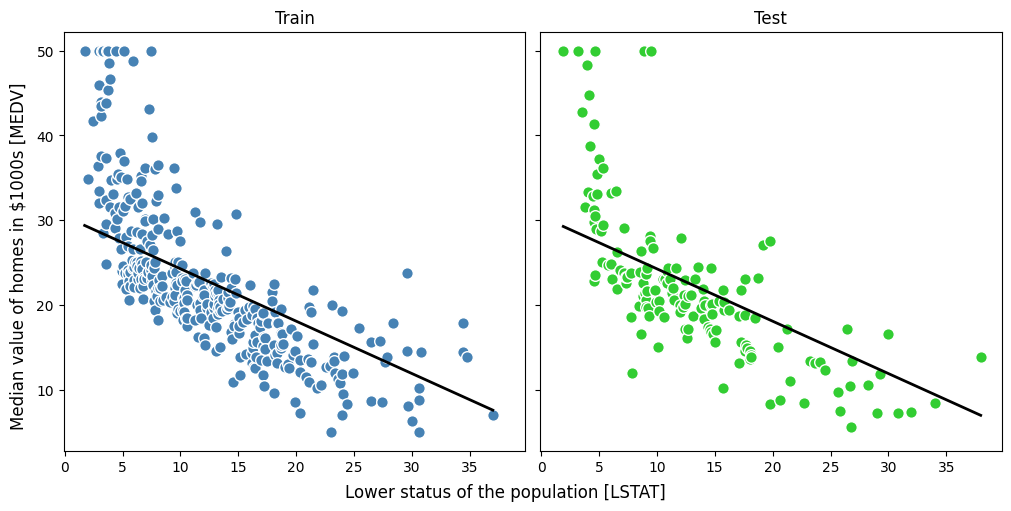

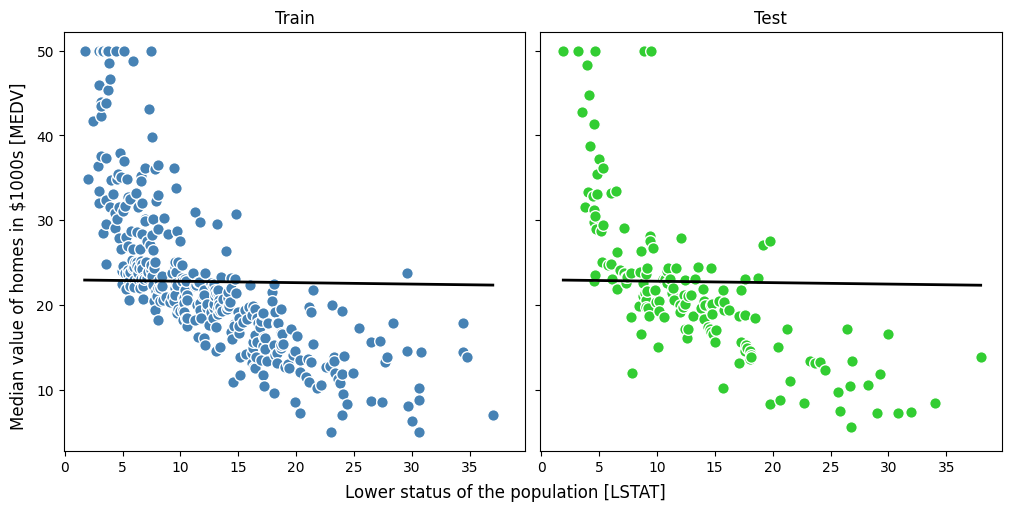

In [5]:
results = []

for name, values in paramSet.items():
    model  = Ridge(**values)
  
    # Fitting model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    store_results(
        results=results,
        model_name=f"Ridge-{name}",
        model=model,
        y_train=y_train,
        y_test=y_test,
        y_train_pred=y_train_pred,
        y_test_pred=y_test_pred,
        params=values,

    )

    # Plotting
    plot_reg(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)
    # plot_res(y_train, y_test, y_train_pred, y_test_pred)

df = pd.DataFrame.from_records(results)
display(df)
